In [1]:
import numpy as np
import argparse
import os, time

from pytamp.benchmark import Rearrange1
from pykin.utils import plot_utils as p_utils

from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

In [2]:
def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=2, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
    parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

In [3]:
args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.box_number
np.random.seed(seed)

usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--box_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-b1bc93a0-e8cc-419e-8097-5d4e2e4d2268.json


In [4]:
object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


*********************** Logical States ***********************
OrderedDict([('Canister0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('Bowl0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=Canister0, pos=[ 0.5595984  -0.02140556  0.8498172 ]),
                           Object(name=Bowl0, pos=[ 0.97196771 -0.07815615  0.80552819]),
                           Object(name=ben_cube0, pos=[0.46392823 0.25045727 0.84779998]),
                           Object(name=bottle0, pos=[0.78584781 0.25198487 0.83593753])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************

********

# Start Scene 

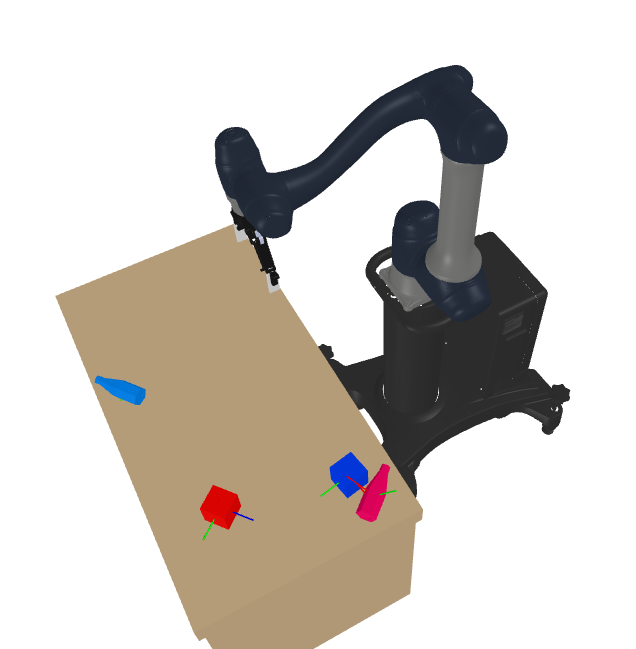

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'Canister0': Object(name=Canister0, pos=[ 0.66006867 -0.24411623  0.8498172 ]), 'Bowl0': Object(name=Bowl0, pos=[ 0.97417641 -0.25131563  0.80552819]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.57409348 -0.03580354  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.82719253 -0.03392161  0.83593753])}


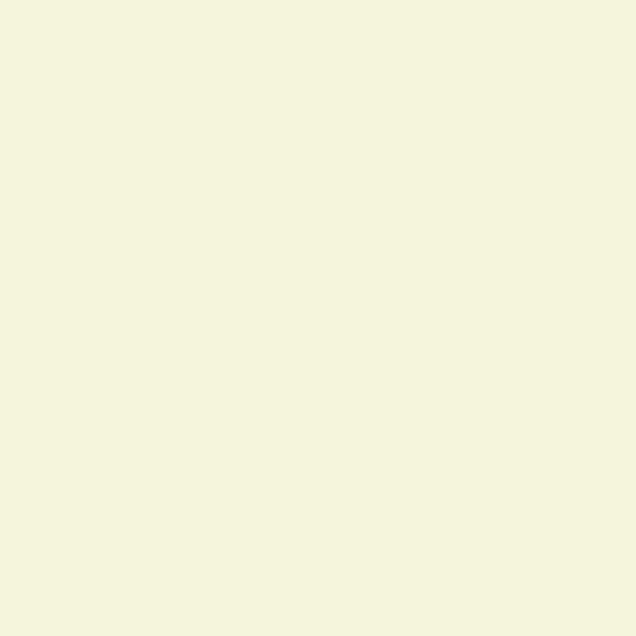

In [11]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

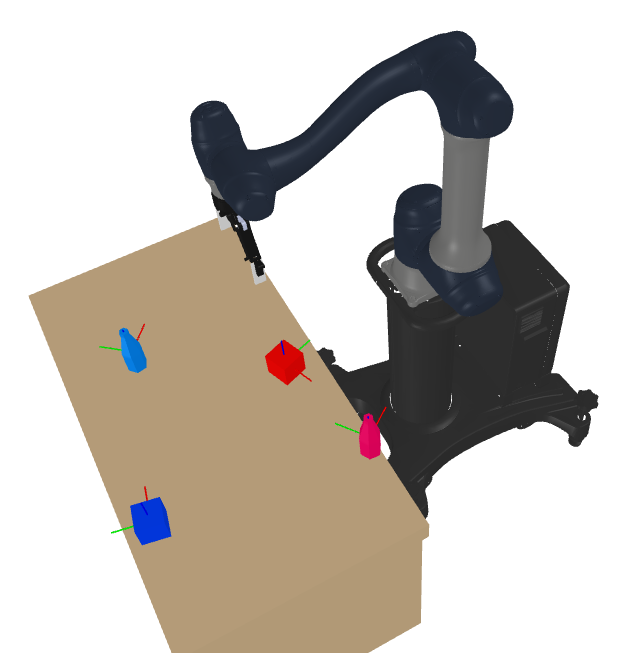

In [5]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

NameError: name 'ax' is not defined

In [6]:
c_list[6]

4.6415888336127775

In [7]:
c = 4
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [8]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 1 ===========
[Action] Rearr bottle0
Good Action
[Reward] S(0) -> A(4) -> S'(6) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(6) -> A(9) -> S'(11) Reward : -1
[Action] Rearr bottle0
not bad Action
[Reward] S(11) -> A(16) -> S'(18) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(18) -> A(22) -> S'(23) Reward : -5.0
[Action] Rearr Bowl0
Good Action
[Reward] S(23) -> A(26) -> S'(30) Reward : 1.0
[Action] Rearr Bowl0
Bad Action
[Reward] S(30) -> A(32) -> S'(35) Reward : -3.333
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(35) -> A(39) -> S'(41) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(41) -> A(46) -> S'(47) Reward : -1
[Action] Rearr Canister0
placed another place not goal
[Reward] S(47) -> A(49) -> S'(53) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(53) -> A(58) -> S'(60) Reward : 0.5
Exceeded th

Good Action
[Reward] S(61) -> A(63) -> S'(284) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(284) -> A(287) -> S'(290) Reward : 1.667
[Action] Rearr bottle0
Good Action
[Reward] S(290) -> A(294) -> S'(296) Reward : 1.25
[Action] Rearr ben_cube0
not bad Action
[Reward] S(296) -> A(299) -> S'(302) Reward : -1
[Action] Rearr Canister0
Bad Action
[Reward] S(302) -> A(303) -> S'(307) Reward : -3.333
[Action] Rearr ben_cube0
Bad Action
[Reward] S(307) -> A(311) -> S'(313) Reward : -2.857
[Action] Rearr bottle0
Bad Action
[Reward] S(313) -> A(318) -> S'(319) Reward : -2.5
[Action] Rearr Canister0
Good Action
[Reward] S(319) -> A(321) -> S'(326) Reward : 0.556
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(326) -> A(329) -> S'(331) Reward : -1
Exceeded the maximum depth!!
########### Running time :  9.699710369110107 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 7 ===========
[Action] Rearr Canister0
Good 

[Action] Rearr Canister0
Bad Action
[Reward] S(550) -> A(551) -> S'(555) Reward : -4.0
[Action] Rearr bottle0
Good Action
[Reward] S(555) -> A(560) -> S'(562) Reward : 0.833
[Action] Rearr bottle0
Bad Action
[Reward] S(562) -> A(566) -> S'(567) Reward : -2.857
[Action] Rearr ben_cube0
Bad Action
[Reward] S(567) -> A(571) -> S'(573) Reward : -2.5
[Action] Rearr Canister0
placed another place not goal
[Reward] S(573) -> A(575) -> S'(579) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(579) -> A(584) -> S'(586) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  17.098556518554688 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 12 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(173) -> A(178) -> S'(588) Reward : 2.5
[Action] Rearr bottle0
Bad Action
[Reward] S(588) -> A(592) -> S'(593) Reward : -6.667

[Action] Rearr Canister0
placed another place not goal
[Reward] S(785) -> A(787) -> S'(791) Reward : -1
[Action] Rearr bottle0
not bad Action
[Reward] S(791) -> A(796) -> S'(798) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(798) -> A(799) -> S'(804) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  23.373230934143066 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 17 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(487) -> A(639) -> S'(641) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(641) -> A(808) -> S'(809) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(809) -> A(813) -> S'(816) Reward : 1.0
[Action] Rearr Bowl0
placed another p

[Action] Rearr bottle0
Good Action
[Reward] S(923) -> A(988) -> S'(990) Reward : 1.0
[Action] Rearr Canister0
Good Action
[Reward] S(990) -> A(991) -> S'(996) Reward : 0.833
[Action] Rearr ben_cube0
not bad Action
[Reward] S(996) -> A(999) -> S'(1002) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1002) -> A(1005) -> S'(1007) Reward : -2.5
[Action] Rearr Canister0
not bad Action
[Reward] S(1007) -> A(1009) -> S'(1014) Reward : -1
[Action] Rearr Canister0
Bad Action
[Reward] S(1014) -> A(1015) -> S'(1019) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  29.762107610702515 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 23 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642

[Action] Rearr Canister0
placed another place not goal
[Reward] S(1173) -> A(1175) -> S'(1179) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(1179) -> A(1184) -> S'(1186) Reward : 0.714
[Action] Rearr bottle0
Bad Action
[Reward] S(1186) -> A(1190) -> S'(1191) Reward : -2.5
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1191) -> A(1196) -> S'(1197) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(1197) -> A(1200) -> S'(1203) Reward : -1
Exceeded the maximum depth!!
########### Running time :  35.41317057609558 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 28 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Canister0
Go

[Action] Rearr bottle0
Good Action
[Reward] S(1334) -> A(1338) -> S'(1340) Reward : 0.625
##########['ben_cube0', 'Canister0', 'Bowl0', 'bottle0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  39.39104223251343 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 33 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Bowl0
Good Action
[Reward] S(647) -> A(950) -> S'(1342) Reward : 1.0
[Action] Rearr Bowl0
Bad Action
[Reward] S(1342) -> A(1344) -> S'(1347) Reward : -3.333
[Action] Rearr bottle0
Good Action
[Reward] S(1347) -> A(1352) -> S'(1354) R

Good Action
[Reward] S(1490) -> A(1492) -> S'(1496) Reward : 0.5
##########['ben_cube0', 'bottle0', 'Canister0', 'Bowl0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  44.04437303543091 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 38 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr bottle0
Good Action
[Reward] S(642) -> A(646) -> S'(924) Reward : 1.25
[Action] Rearr Bowl0
Good Action
[Reward] S(924) -> A(926) -> S'(1270) Reward : 1.0
[Action] Rearr bottle0
not bad Action
[Reward] S(1270) -> A(1500) -> S'(1502) Reward : -1
[Action] Rearr Bowl0
not bad Action
[Reward] S(1502) -> A(1504) -> S'(1508) Reward : -1
[Action] Rearr ben_cube0


placed another place not goal
[Reward] S(1641) -> A(1646) -> S'(1647) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1647) -> A(1651) -> S'(1654) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1654) -> A(1657) -> S'(1660) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(1660) -> A(1662) -> S'(1665) Reward : -1
Exceeded the maximum depth!!
########### Running time :  48.64787030220032 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 44 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(647

[Action] Rearr Bowl0
Good Action
[Reward] S(1762) -> A(1764) -> S'(1768) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  51.80725336074829 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 49 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
Good Action
[Reward] S(642) -> A(644) -> S'(648) Reward : 1.25
[Action] Rearr bottle0
placed another place not goal
[Reward] S(648) -> A(652) -> S'(653) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(653) -> A(657) -> S'(1770) Reward : -1
[Action] Rearr Bowl0
Bad Action
[Reward] S(1770) -> A(1772) -> S'(1775) Reward : -2.857
[Action] Rearr bottle0
Good Action
[Reward] S(1775) -> A(1780) -> S'(1

placed another place not goal
[Reward] S(653) -> A(658) -> S'(1881) Reward : -1
[Action] Rearr Canister0
placed another place not goal
[Reward] S(1881) -> A(1883) -> S'(1887) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(1887) -> A(1892) -> S'(1894) Reward : 0.625
[Action] Rearr Bowl0
Bad Action
[Reward] S(1894) -> A(1896) -> S'(1899) Reward : -2.222
[Action] Rearr bottle0
Bad Action
[Reward] S(1899) -> A(1904) -> S'(1905) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  55.98399496078491 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 55 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) 

[Action] Rearr ben_cube0
not bad Action
[Reward] S(659) -> A(2001) -> S'(2004) Reward : -1
[Action] Rearr Canister0
placed another place not goal
[Reward] S(2004) -> A(2005) -> S'(2009) Reward : -1
[Action] Rearr Bowl0
Bad Action
[Reward] S(2009) -> A(2012) -> S'(2015) Reward : -2.222
[Action] Rearr Canister0
Good Action
[Reward] S(2015) -> A(2017) -> S'(2022) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  59.22466063499451 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 60 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward

[Action] Rearr Bowl0
placed another place not goal
[Reward] S(1673) -> A(2104) -> S'(2107) Reward : -1
[Action] Rearr Canister0
not bad Action
[Reward] S(2107) -> A(2109) -> S'(2114) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(2114) -> A(2116) -> S'(2119) Reward : -1
Exceeded the maximum depth!!
########### Running time :  62.395254611968994 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 66 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(647) -> A(949) -> S'(1322) Reward : 1.0
[Action] Rearr bottle0
placed ano

Bad Action
[Reward] S(2184) -> A(2185) -> S'(2189) Reward : -2.222
[Action] Rearr Canister0
Good Action
[Reward] S(2189) -> A(2191) -> S'(2196) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  64.32469058036804 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 72 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(487) -> A(639) -> S'(641) Reward : -1
[Action] Rearr Canister0
placed another place not goal
[Reward] S(641) -> A(805) -> S'(2197) Reward : -1
[Action] Rearr Bowl0
Good Action
[Reward] S(2197) -> A(2200) -> S'(2204) Reward : 1.0
[Action] Rearr Bowl0
Bad Action
[Reward] S(2204) -> A(2206) -> S'(2209) Reward : -3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(2209) -> A(2213) -> S

[Action] Rearr Bowl0
Good Action
[Reward] S(2327) -> A(2330) -> S'(2334) Reward : 0.556
[Action] Rearr Bowl0
not bad Action
[Reward] S(2334) -> A(2336) -> S'(2340) Reward : -1
Exceeded the maximum depth!!
########### Running time :  68.85604929924011 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 77 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Canister0
Good Action
[Reward] S(642) -> A(643) -> S'(848) Reward : 1.25
[Action] Rearr ben_cube0
not bad Action
[Reward] S(848) -> A(851) -> S'(2342) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(2342) -> A(2346) -> S'(2347) Reward : -1
[Action] Rearr Bowl0
Good Action
[Reward] S(2347) -> A(2350) 

[Action] Rearr Canister0
Bad Action
[Reward] S(2101) -> A(2449) -> S'(2453) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  71.99147152900696 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 85 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(647) -> A(949) -> S'(1322) Reward : 1.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1322) -> A(1326) -> S'(1667) Reward : -1
[Action] Rearr Bowl0
Good Action
[Reward] S(1667) -> A(1670) -> S'(1674) Reward : 0.714
[Action] Rearr Canister0
Bad Action
[Reward] S(16

[Action] Rearr Canister0
Bad Action
[Reward] S(2487) -> A(2489) -> S'(2493) Reward : -2.222
[Action] Rearr Bowl0
Good Action
[Reward] S(2493) -> A(2496) -> S'(2500) Reward : 0.5
Exceeded the maximum depth!!
########### Running time :  73.23095965385437 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 4, Seed: 2
=========== Search iteration : 92 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(173) Reward : -1
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(173) -> A(176) -> S'(487) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(487) -> A(639) -> S'(642) Reward : 1.667
[Action] Rearr Bowl0
placed another place not goal
[Reward] S(642) -> A(644) -> S'(647) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(647) -> A(949) -> S'(1322) Reward : 1.0
[Action] Rearr Canister0
not bad Action
[Reward] S(1322) -> A(1323) -> S'(1328) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(1328) -> A(1332)

In [11]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

4.575000000000001

In [12]:
mcts.tree.nodes[4]

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fc6808446d0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'bottle0',
  'rearr_poses': [{'bottle0': array([[-0.89572616, -0.35199314, -0.27161641,  0.39046897],
           [ 0.25279771,  0.09934181, -0.96240559, -0.0045865 ],
           [ 0.36574303, -0.93071587,  0.        ,  0.83593753],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])},
   {'bottle0': array([[ 0.84620121, -0.53286351,  0.        ,  0.62250155],
           [ 0.53286351,  0.84620121,  0.        ,  0.28378891],
           [ 0.        ,  0.        ,  1.        ,  0.87515735],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': -12.733333333333333,
 'value_history': [-12.733333333333333],
 'visit': 1,
 'number': 4,
 'type': 'action',
 'joints': [],
 'level1': False,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

In [15]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[idx]['nodes']
idx, max_value_nodes

(0,
 [0,
  3,
  173,
  176,
  487,
  639,
  642,
  644,
  648,
  652,
  653,
  655,
  660,
  662,
  666,
  670,
  672])

In [16]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print("Result : ", max_value_nodes)
    mcts.render_rearr("_", max_value_nodes)

Result :  [0, 3, 173, 176, 487, 639, 642, 644, 648, 652, 653, 655, 660, 662, 666, 670, 672]


=========== Search iteration : 1 ===========
[Action] Rearr Bowl0
Good Action
[Reward] S(0) -> A(2) -> S'(6) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(6) -> A(9) -> S'(11) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(11) -> A(16) -> S'(17) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(17) -> A(22) -> S'(23) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(23) -> A(25) -> S'(30) Reward : 1.0
[Action] Rearr Canister0
not bad Action
[Reward] S(30) -> A(31) -> S'(36) Reward : -1
[Action] Rearr Bowl0
not bad Action
[Reward] S(36) -> A(38) -> S'(42) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(42) -> A(45) -> S'(48) Reward : 0.625
[Action] Rearr Canister0
not bad Action
[Reward] S(48) -> A(49) -> S'(54) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(54) -> A(58) -> S'(60) Reward : 0.5
##########['Bowl0', 'Canister0', 'ben_cube0', 'bottle0']#############
Succe

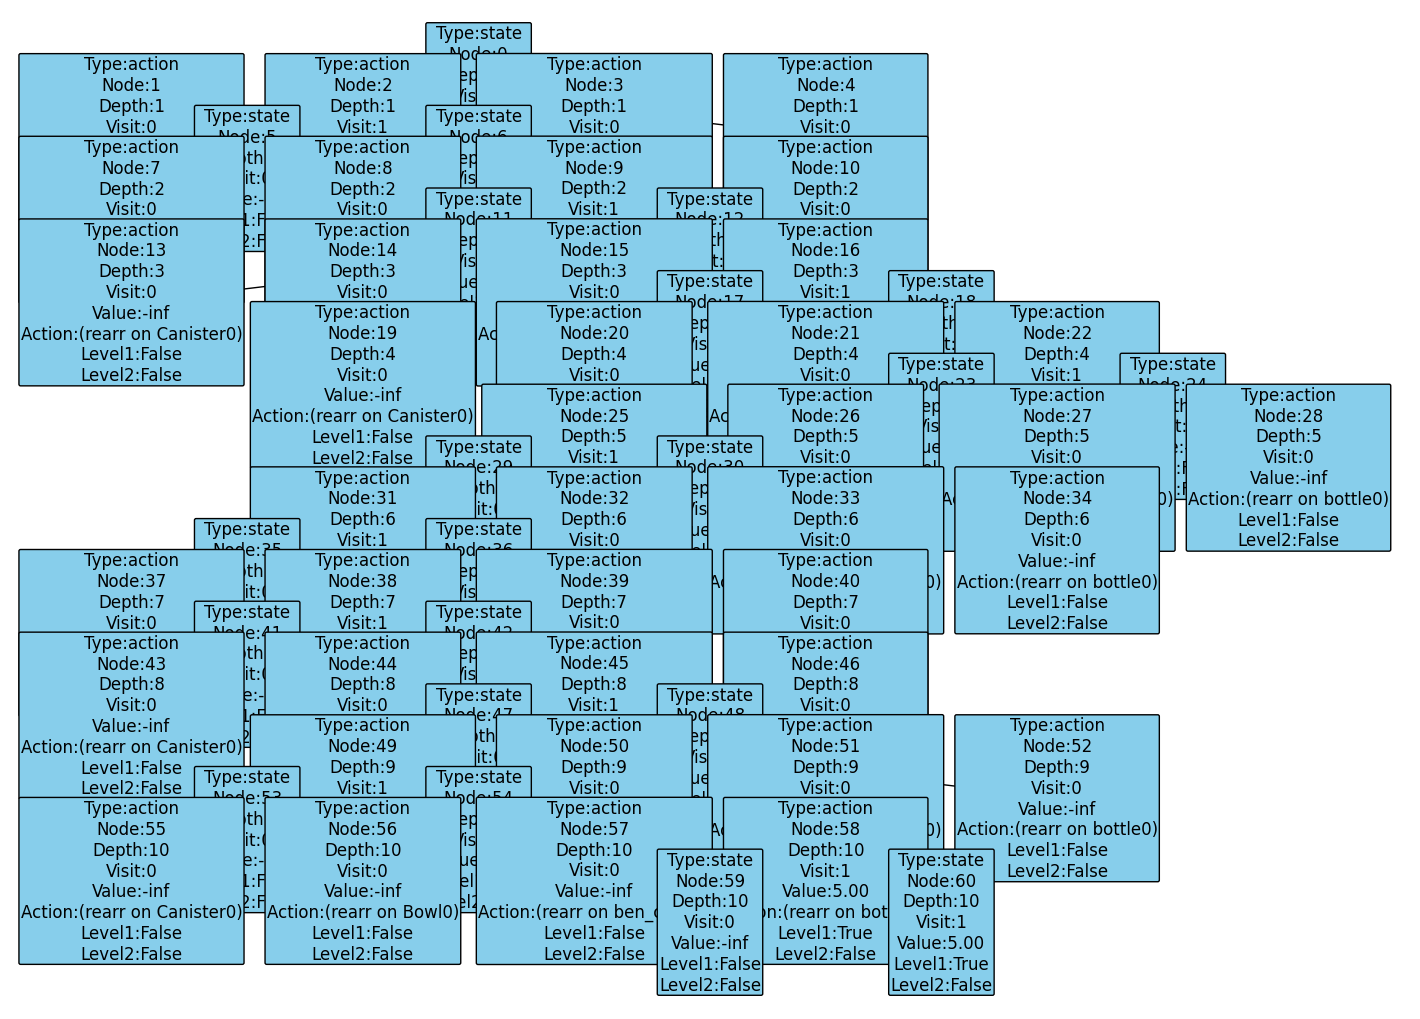

In [6]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)